In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/image dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 478 images belonging to 3 classes.


In [12]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/image dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 119 images belonging to 3 classes.


In [8]:
class_indices=train_generator.class_indices
#extra class names
class_names=list(class_indices.keys())
print("class indies:",class_indices)
print("class names:",class_names)

class indies: {'David': 0, 'Sri': 1, 'prajin': 2}
class names: ['David', 'Sri', 'prajin']


In [15]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6307 - loss: 2.0379

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 112s 7s/step - accuracy: 0.6309 - loss: 1.9983 - val_accuracy: 0.6807 - val_loss: 0.8599
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.7188 - loss: 0.6809 - val_accuracy: 0.7395 - val_loss: 0.8150
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.8442 - loss: 0.4140 - val_accuracy: 0.7395 - val_loss: 0.7093
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.8790 - loss: 0.3466 - val_accuracy: 0.4118 - val_loss: 0.9020
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.9494 - loss: 0.1584 - val_accuracy: 0.3613 - val_loss: 1.3785


In [18]:
model.save('/content/drive/MyDrive/image dataset/face recognition.h5')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/image dataset/face recognition.h5')
print("Model Loaded")

Model Loaded


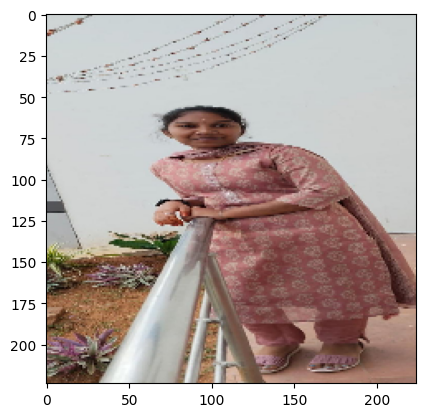

In [34]:
test_image_path="/content/drive/MyDrive/image dataset/train/Sri/srii_original_Image 2025-12-10 at 15.43.29_9b368b7f.jpg_2e2fb7f6-c335-4f18-89bc-8edc46c5e31b.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [35]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [36]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Sri
